<a href="https://colab.research.google.com/github/yvoirin/python_notebooks/blob/main/Reconnaissance_des_nombres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utiliser Jupyter Notebook et TensorFlow/Keras

## Objectifs

Le but est de pouvoir exécuter du code Python faisant appel à Keras/TensorFlow. On va entrainer un réseau sur les données MNIST (http://yann.lecun.com/exdb/mnist/) et 
ensuite présenter nos propres images.

(réf. : http://robhardwick.me/ml/hello-world/)

Dans Jupyter sur Azure TensorFlow et Keras libs sont déjà présentes.

## Vérifier l'installation

Avec quelques instuctions, on peut vérifier l'installation.

In [1]:
import keras
print(keras.__version__)

2.11.0


## Préparation du jeu d'entrainement

On prépare les jeux d'entrainement et de test

En utilisant Keras, on importe les données d'entrainement

In [2]:
from keras.datasets import mnist
#keras will automatically downlhoad the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Vérification du jeu

On vérifie la lecture des jeux de données *(il est possible qu'il faudra exécuter 2 fois la cellule pour voir les figures)*

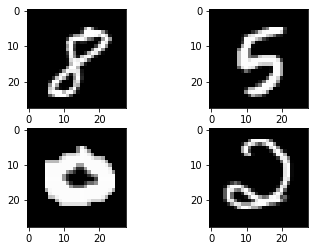

In [3]:
# on utilise matplotlib pour afficher les données
%matplotlib inline
# on importe les fonctions
import matplotlib.pyplot as plt
import random
#taille du jeu de données
train_size = len(x_train)
#génère un nombre aléatoire
random.seed(49)
# on va créer le graphique (4 graphes)
# on va simplement afficher 4 images utilisées pour l'entrainement

plt.subplot(221)
plt.imshow(x_train[random.randint(0, train_size-1)], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[random.randint(0, train_size-1)], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[random.randint(0, train_size-1)], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[random.randint(0, train_size-1)], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

## Préparation des données

On envoie pas des images au réseau de neurone. On va simplement envoyer une ligne de pixels (1d) composée de tous les pixels de l'image.

On va modifier les données en entrée pour avoir une seule ligne

In [4]:
# nombre des pixels
num_pixels = x_train.shape[1] * x_train.shape[2]
#on refait nos données d'entrainement en 1 lignes de 784 pixels
x_train = x_train.reshape(x_train.shape[0], num_pixels) / 255
x_test = x_test.reshape(x_test.shape[0], num_pixels) / 255

On va convertir les données (entrainement et test) pour obtenir en sortie du réseau des résultats de type catégories

In [5]:
from keras.utils import np_utils
# on souhaite avoir en sortie une activation selon le chiffre (0 à 9)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

## Construction du réseau

On va construire le réseau (c'est inspiré du code de http://robhardwick.me/ml/hello-world/).

On peut inventer le réseau que l'on souhaite. En fonction de notre connaissance dans l'IA, on peut faire varier les couches et le type de couches.

In [6]:
# on importe les libs
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Lambda, Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
num_classes = len(y_train[0])
# on définit la succession des couches
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(64, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(1024))
model.add(Dropout(0.4))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

On affiche le réseau

In [7]:
for i, layer in enumerate(model.layers):
    print(i,layer.name)

0 conv2d
1 activation
2 max_pooling2d
3 conv2d_1
4 activation_1
5 max_pooling2d_1
6 flatten
7 dense
8 dropout
9 dense_1
10 activation_2


On construit le réseau

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

On l'entraine (cette dernière opération peut prendre 20 min). Activer le GPU pour accélérer les choses.

In [9]:
round = 10#nombre de tour pour l'apprentissage (3 signifie que l'on présente 3 fois le j
#eu d'entrainement, on peut facilement augmenter ce nombre)
# on présente 3 fois 200 exemples
model.fit(x_train, y_train, validation_split=0.1, epochs=round, batch_size=200, verbose=
2)

Epoch 1/10
270/270 - 75s - loss: 0.1927 - accuracy: 0.9395 - val_loss: 0.0534 - val_accuracy: 0.9865 - 75s/epoch - 278ms/step
Epoch 2/10
270/270 - 93s - loss: 0.0497 - accuracy: 0.9844 - val_loss: 0.0393 - val_accuracy: 0.9882 - 93s/epoch - 343ms/step
Epoch 3/10


KeyboardInterrupt: ignored

## Vérification de l'apprentissage

On peut évaluer la précision sur le jeu de test.

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)

print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

## Test sur nos données

On va évaluer nos images avec le réseau entrainé

In [ ]:
from keras.preprocessing import image
import glob
import numpy as np
#load the images
images = sorted(glob.glob('numbers/*.jpg'))
for filename in images:
    img = image.load_img(filename, target_size=(28, 28))
    img = img.convert('L')
    x = image.img_to_array(img)
    x = 255 - x
    x = (x - x.min()) / (x.max() - x.min())
    x = np.expand_dims(x, axis=0)
    npimg = np.vstack([x])
    classes = classes_x=np.argmax(model.predict(npimg),axis=1) 
    probas = model.predict(npimg)
    print("Fichier %s est un %d (%.2f %%)" % (filename, classes[0], 100*probas[0]
    [classes[0]]))

On affiche les images testées

In [ ]:
# on utilise matplotlib pour afficher les données
%matplotlib inline

# on importe les fonctions
import matplotlib.pyplot as plt

# on va créer le graphique (4 graphes)
# on va simplement afficher 4 images utilisées pour l'entrainement
plt.subplot(221)
plt.imshow(image.load_img('numbers/0.jpg',  target_size=(28, 28)), cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(image.load_img('numbers/1.jpg',  target_size=(28, 28)), cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(image.load_img('numbers/2.jpg',  target_size=(28, 28)), cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(image.load_img('numbers/7.jpg',  target_size=(28, 28)), cmap=plt.get_cmap('gray'))
# show the plot
plt.show()